In [1]:
####################################################################
###    This is the PYTHON version of program 8.4 from page 306 of  #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is the SIR model with two different risk-groups, each group #
### has an associated birth and vaccination rate.				   #
###																   #
### Note, gamma, mu, p, S and I are all vectors. beta is a matrix. #
### tV is the time at which vaccination starts.    				   #
####################################################################

In [2]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

*beta is the matrix of transmission rates and incorporates the encounter rate between susceptible and infectious individuals together with the probability of transmission.

*gamma is called the removal or recovery rate, though often we are more interested in its reciprocal (1/γ) which determines the average infectious period.

*μH is the birth rate for the high risk group. The proportion of the population in the high-risk group is μH/μ

*μL	is the birth rate for the low risk group. The proportion of the population in the high-risk group is μL/μ

*mu is the per capita death rate for μH and μL respectively.

*pH is the proportion of the high-risk group that are vaccinated at birth.

*pL is the proportion of the low-risk group that are vaccinated at birth.

*tV	is the time at which the vaccination program is begun.

*S(0) is the initial proportion of the population that are both susceptible and in risk group X.

*I(0) is the initial proportion of the population that are both infectious and in risk group X.

In [3]:
beta=np.array([[1., 0.01],[0.01 ,0.1]]);
gamma=np.array([0.1, 0.1]);
#mu consists of μH and μL
mu=np.array([0.2, 0.8])*5e-5;
#p0 consists of pH and pL
p0=np.array([0.4, 0.1]);
tV=50*365;
S0=np.array([0.1, 0.7]);
I0=np.array([1e-5, 1e-5]);
ND=MaxTime=100*365;
TS=1.0

In [4]:
INPUT = np.hstack((S0,I0))

In [5]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((4))
	V = INP   
	MU=sum(mu)
	for i in range(2):
		Y[i]= mu[i]*(1-p[i]) - (beta[i,0]*V[2]+beta[i,1]*V[3])*V[i] - MU*V[i]
		Y[i+2]= (beta[i,0]*V[2]+beta[i,1]*V[3])*V[i] - gamma[i]*V[i+2] - MU*V[i+2]
	return Y   # For odeint


In [6]:
t_start = 0.0; t_end = tV; t_inc = TS
t_range1 = np.arange(t_start, t_end, t_inc)
t_start = tV; t_end = ND; t_inc = TS
t_range2 = np.arange(tV, t_end, t_inc)
T = np.hstack((t_range1, t_range2))
p=np.array([0,0])
RES1 = spi.odeint(diff_eqs,INPUT,t_range1)
p=p0
RES2 = spi.odeint(diff_eqs,RES1[-1],t_range2)
print(RES2)



[[1.00891832e-01 7.44034038e-01 5.34478350e-05 1.48471416e-05]
 [1.00887375e-01 7.44031332e-01 5.35076369e-05 1.48640391e-05]
 [1.00882912e-01 7.44028625e-01 5.35672660e-05 1.48809413e-05]
 ...
 [9.95598115e-02 7.26128127e-01 1.36619198e-06 3.64989681e-07]
 [9.95606971e-02 7.26127784e-01 1.36588611e-06 3.64895687e-07]
 [9.95615827e-02 7.26127441e-01 1.36558150e-06 3.64802037e-07]]


In [7]:
S1 = np.hstack((RES1[:,0],RES2[:,0]))
S2 = np.hstack((RES1[:,1],RES2[:,1]))
I1 = np.hstack((RES1[:,2],RES2[:,2]))
I2 = np.hstack((RES1[:,3],RES2[:,3]))

TT = np.arange(len(S1))

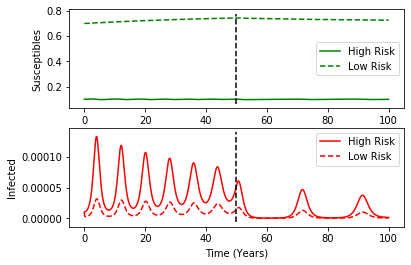

In [8]:
pl.subplot(211)
pl.plot(TT/365.0, S1, '-g')
pl.plot(TT/365.0, S2, '--g')
pl.legend(('High Risk','Low Risk'), loc=0)
ll=pl.ylim()
tVV=np.repeat([tV/365.],len(ll))
pl.plot(tVV, ll, '--k')
pl.ylabel('Susceptibles')
pl.subplot(212)
pl.plot(TT/365.0, I1, '-r')
pl.plot(TT/365.0, I2, '--r')
ll=pl.ylim()
tVV=np.repeat([tV/365.],len(ll))
pl.plot(tVV, ll, '--k')
pl.ylabel('Infected')
pl.legend(('High Risk','Low Risk'), loc=0)
pl.xlabel('Time (Years)')

pl.show()